<a href="https://colab.research.google.com/github/Hazim-HF/Project2DataScience/blob/main/P152419_Project2_STQD6014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
    <h3>
        Project 2 <br>
        Hazim Fitri Bin Ahmad Faudzi (P152419) <br>
        Data Science (STQD6014) <br>
        Dr Bernard Lee Kok Bang
    </h3>
</div>


# 1. Introduction
Nowadays, understanding of socio-economic factors that influence the income level has become more important for policymakers and business.
This project aims to derive insights from Adult dataset which is from the UCI Machine Learning Repository.This project will visualize important aspect that will give deeper insight to stakeholder to make sure they can make data-driven decision making.

# 2. Dataset Background
Adult dataset also known as census income dataset is data extracted by Barry Becker from the 1994 Census.This data is available in the UCI Machine Learning Repository. This data has various feature of adult such as age, education, marital status, and so on. The main is famous for machine learning and data mining as it can be used for task such as classification and regression. This data often used to develop predictive modelling to predict whether an individual earns more than $50,000 or not. The data contains 48,842 line of data and have 14 attributes in the dataset. Link to the data [Census Income](https://archive.ics.uci.edu/dataset/20/census+income). A short overview of the data is as below:

- **Age**: Continuous.
- **Workclass**: Categorical (e.g., Private, Self-emp-not-inc, etc.).
- **Education**: Categorical (e.g., Bachelors, Some-college, etc.).
- **Education-num**: Continuous (Number of years of education).
- **Marital-status**: Categorical (e.g., Married-civ-spouse, Divorced, etc.).
- **Occupation**: Categorical (e.g., Tech-support, Craft-repair, etc.).
- **Relationship**: Categorical (e.g., Wife, Own-child, etc.).
- **Race**: Categorical (e.g., White, Black, etc.).
- **Sex**: Categorical (Male or Female).
- **Capital-gain**: Continuous.
- **Capital-loss**: Continuous.
- **Hours-per-week**: Continuous.
- **Native-country**: Categorical (e.g., United States, Mexico, etc.).

# 3. Data Collection and Data Wrangling

In this analysis, the dataset is imported directly from the **UCI Machine Learning Repository** using the `ucimlrepo` library, eliminating the need to manually download and open the file in Excel. The `ucimlrepo` library provides a convenient way to access datasets programmatically by fetching them directly from the repository.

In [283]:
# Install uciml repo to import data from UCI Machine Learning Repository
!pip install ucimlrepo

In [284]:
# fetch dataset from uci machine learning respository
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets
df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [285]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [286]:
# View data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


the dataset contains **48,842 entries** and **15 columns**, with a mix of numerical (int64) and categorical (object) data types. The numerical columns include age, fnlwgt, education-num, capital-gain, capital-loss, and hours-per-week. Meanwhile, categorical columns include workclass, education, and income.

Additionally, the `info()` output highlights missing values in the dataset. For instance, workclass has **47,879 non-null values**, meaning there are **963 missing values**. Similarly, occupation and native-country have missing values, which may impact analysis and model performance if not handled properly. Common approaches for handling missing data include imputation with the mode or median, or dropping rows with missing values depending on the proportion of missingness. This analysis suggests that preprocessing steps, such as handling missing values and converting categorical variables, will be essential before performing any advanced analytics or machine learning tasks.






In [287]:
# View the statistical summary of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The **age** variable has a mean of **38.6 years** with a standard deviation of **13.7 years**, indicating that most individuals are in their prime working years. The **minimum age is 17**, while the **maximum is 90**, covering a wide range. The interquartile range (IQR) of 28 to 48 suggests that the majority of people fall within this working-age bracket, with a median age of 37.

The **fnlwgt** (Final Weight) represents population weights assigned by the Census Bureau, with a **mean of 189,664** and a **standard deviation of 105,604**, showing high variability. The values range from 12,285 to 1,490,400, meaning that different individuals represent vastly different segments of the population. This variability indicates the importance of using weighted analyses when drawing conclusions from this dataset.

The **education-num** variable, which quantifies education level, has a **mean of 10.1**, aligning with "Some College" education. The range is from 1 (Preschool) to 16 (Doctorate), with a median of 10, meaning that most individuals have completed high school or some college. The IQR (9-12) suggests that a large proportion of individuals have education levels between high school and an associate degree.

The **capital-gain** and **capital-loss** variables are highly skewed. The **mean capital gain is 1,079**, but the 75th percentile is still 0, indicating that the majority of individuals report no capital gains. However, the maximum value is 99,999, suggesting that a small subset of high-income individuals receive significant investment returns. Similarly, capital-loss has a **mean of 87.5**, but since the median and 75th percentile are 0, it is clear that most people do not report losses, while a few individuals face significant financial losses (up to 4,356).

The **hours-per-week** variable shows that the **average workweek is 40.4 hours**, close to a standard full-time job. The IQR (40-45) indicates that most people work standard full-time hours. However, the minimum is just 1 hour, while the maximum is 99 hours, suggesting that some individuals either work part-time or have extreme work schedules.

## 3.1. Handling missing values

Before analyzing the dataset, handling missing values is crucial to ensure data quality and accuracy. This involves identifying columns with missing values and deciding on appropriate strategies such as imputation, removal, or filling with default values. For categorical variables, missing values can be replaced with the most frequent category or "Unknown," while for numerical variables, mean or median imputation is common. Proper handling of missing values prevents biases and inconsistencies in the analysis.

In [288]:
# View the total number of missing values in the whole dataset
df.isnull().sum().sum()



2203

In [289]:
# View the total number of missing values in each columns
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


The output shows that missing values are present in three categorical columns: **workclass (963), occupation (966), and native-country (274)**. Since these variables are of object (string) type, we will handle them by filling missing values with the most frequent category to retain all data points. This approach ensures that we do not lose valuable information while maintaining consistency in the dataset.

Before handling the missing values, we will first check the unique values in categorical columns to ensure data consistency. This step is essential to identify any inconsistencies. Identifying and correcting these discrepancies before imputation ensures accurate data preprocessing.  



In [290]:
# View all the unique values in the 'workclass' column
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [291]:
# View all the unique values in the 'occupation' column
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [292]:
# View all the unique values in the native-country column
df['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In the **Census Income dataset**, the **workclass** column has a total of **2,799 missing or unknown values**. This includes **1,836 instances of '?'** and **963 missing values**. Since the **workclass** column has **48,842 rows**, the percentage of missing values for this column is approximately **5.7%**.  

Similarly, the **occupation** column has **2,902 missing values**, consisting of **1,936 instances of '?'** and **966 missing values**. This represents around **5.9%** of the total rows in the dataset. Finally, the **native-country** column has **857 missing or unknown values**, made up of **274 missing values** and **583 instances of '?'**, which accounts for about **1.8%** of the dataset.  

Given these percentages, removing rows with missing or unknown values would result in unnecessary data loss. Therefore, an appropriate method is to replace the missing or unknown values in these columns with a distinct category, such as **"Unknown"**, rather than imputing them with the most frequent class. This strategy preserves the data integrity while avoiding bias that could arise from assuming missing values follow the distribution of existing data.

This method is supported by **Géron (2019)**, who suggests that when dealing with missing categorical data, replacing missing values with an **"Unknown"** category preserves dataset integrity and prevents misleading imputation. Additionally, **Pedregosa et al. (2011)** highlight that imputing categorical values with the mode can introduce bias if the missing values are not randomly distributed. The **pandas documentation (2024)** also recommends using categorical placeholders rather than statistical imputation for categorical variables. By following this approach, we ensure that the dataset remains consistent, reducing the risk of biased analysis while maintaining the original data structure.

In [329]:
# Replace the '?' with the mode of the workclass column
df['workclass'] = df['workclass'].str.replace('?', 'unknown', regex=False)

# Fill missing 'workclass' with mode
df['workclass'] = df['workclass'].fillna('unknown')

# Replace the '?' with the mode of the occupation column
df['occupation'] = df['occupation'].str.replace('?', 'unknown', regex=False)

# Fill missing 'occupation' with mode
df['occupation'] = df['occupation'].fillna('unknown')

# Replace the '?' with the mode of the native country column
df['native-country'] = df['native-country'].str.replace('?', 'unknown', regex=False)

# Fill missing 'native-country' with mode
df['native-country'] = df['native-country'].fillna('unknown')

## 3.2. Remove duplicate

Duplicate records can introduce redundancy and bias into data analysis, affecting the accuracy of statistical summaries and machine learning models. In the Census Income dataset, we will identify duplicates and remove them, ensuring only unique observations remain. However, before dropping duplicates, it is crucial to assess whether they result from data entry errors or represent valid repeated records. Retaining unnecessary duplicates can lead to misleading results, especially in classification tasks. Géron (2019) and Pedregosa et al. (2011) emphasize that removing duplicate entries improves model performance and prevents data leakage, making it a necessary step in preprocessing.

In [294]:
# Calculate the number of duplicated rows in the data
df.duplicated().sum()

29

In [295]:
# Remove duplicated rows
df = df.drop_duplicates(subset=None, keep='first')

# Calculate the number of duplicated rows to make sure duplicates rows has been removed
df.duplicated().sum()

0

During the data cleaning process, we identified **29 duplicated rows** in the dataset. To ensure data integrity and prevent redundancy, we **removed these duplicate entries**. This step helps maintain the accuracy of statistical analysis and machine learning models by eliminating repeated observations that could bias results. After this correction, the dataset now contains only unique records, ensuring more reliable insights.

## 3.3. Detect outliers

Outliers are extreme values that can distort statistical analysis and machine learning models if not handled properly. In the Census Income dataset, we will use boxplot visualiztion methods to detect outliers. Handling these outliers depends on their nature—errors may be removed or corrected, while meaningful rare values should be retained for further analysis. Géron (2019) and Aggarwal (2017) highlight that carefully managing outliers preserves data integrity and prevents bias in modeling, ensuring more reliable insights.

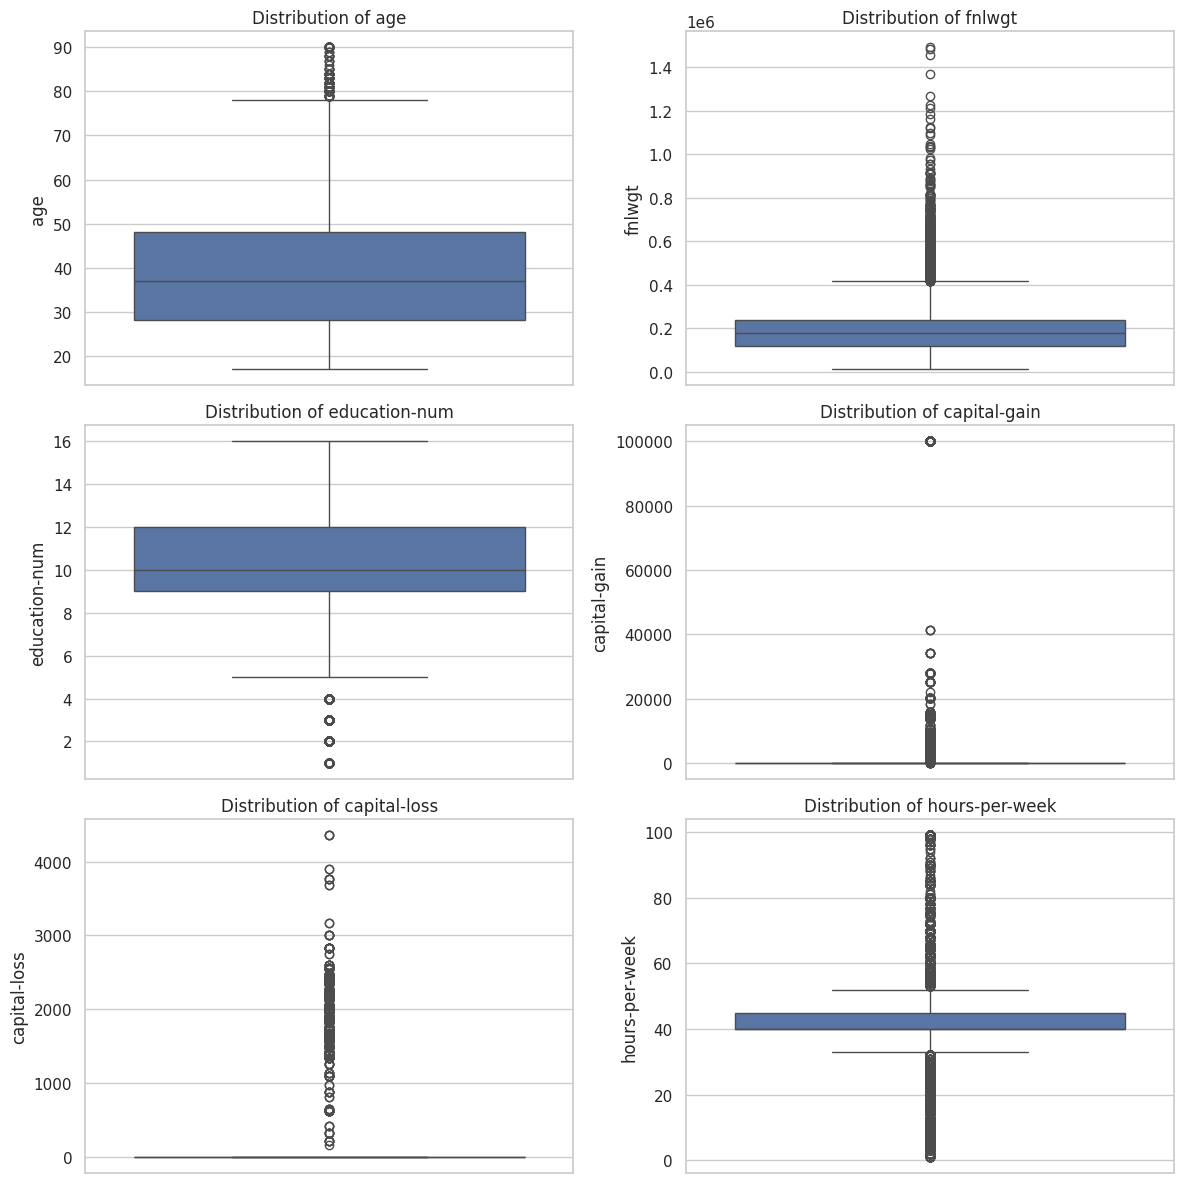

In [296]:
# Plot a boxplot for each numerical column
# Define all numerical columns
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(3, 2, figsize=(12,12)) # Create a 3x2 grid of subplots
axes = axes.flatten()

for i, col in enumerate(cols): # Iterate through the list of columns
    sns.boxplot(y=df[col], ax=axes[i]) # Create boxplot of each column
    axes[i].set_title(f'Distribution of {col}') # Set title of each subplot

plt.tight_layout()
plt.show() # display plot

In the **age** distribution, a **few outliers appear beyond 70 years**, indicating a small proportion of older individuals in the dataset. While **most ages fall within 28 to 48 years**, those aged above 70 are rare but still part of the working population.

The **fnlwgt** (final weight) variable has a large number of extreme outliers. The dataset assigns population weights, and while **most values are concentrated below 400,000**, a **few exceed 1.2 million**, suggesting certain individuals represent significantly larger portions of the population. These high-weight values should be carefully considered in weighted analyses.

For **education-num**, **outliers appear at the lower end**, particularly for individuals with very little formal education (values below 4). This suggests that while most individuals have at least some schooling, a small group lacks significant education, which could impact their earning potential.

The **capital-gain and capital-loss** distributions show **extreme outliers**. Most individuals report zero capital gains or losses, but a **few report capital gains up to 99,999 and capital losses exceeding 4,000**. These outliers likely represent high-income investors or individuals with substantial asset fluctuations.

The **hours-per-week** variable shows outliers at both extremes. While **most people work around 40 hours per week**, a few report working **above 80 hours** or **as low as 1 hour**. The upper-end outliers might indicate individuals with multiple jobs or self-employed workaholics, while the lower-end values could represent part-time workers or data entry anomalies.

Overall, these outliers provide valuable insights into income distribution, work patterns, and socioeconomic disparities. While some may be genuine, others could be errors or anomalies requiring further investigation before building predictive models.

## 3.4. Handling inconsistent data

Inconsistent data occurs when values in a dataset are not standardized, leading to discrepancies that can affect analysis and model performance. In the **Census Income dataset**, inconsistencies may appear in categorical variables due to variations in spelling, capitalization, or the presence of unexpected characters. To address this, we will first check for unique values in categorical columns to identify inconsistencies. Then, we will standardize the data by stripping unnecessary spaces, converting text to lowercase, and replacing inconsistent values with their correct form. **Géron (2019)** emphasize that cleaning inconsistencies is crucial for maintaining dataset reliability, improving model accuracy, and ensuring meaningful analysis.

While handling missing values, we already checked the unique values for workclass, occupation, and native-country to identify and manage unknown or placeholder values. Now, we will focus on verifying consistency in education, marital-status, relationship, race, sex, and income

In [297]:
# Print all unique values from the education column
print(df['education'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [298]:
# Print all unique values from the marital-status column
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [299]:
# Print all unique values from the relationship column
print(df['relationship'].unique())

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [300]:
# Print all unique values from the race column
print(df['race'].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [301]:
# Print all unique values from the sex column
print(df['sex'].unique())

['Male' 'Female']


In [302]:
# Print all unique values from the income column
print(df['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [303]:
# Standardize unique values from income column by removing '.'
df['income'] = df['income'].str.replace('.', '', regex=False)

# Print unique values from income column to make sure '.' has been removed
print(df['income'].unique())

['<=50K' '>50K']


After verifying the unique values for **education, marital-status, relationship, race, sex, and income**, we found that all columns were consistent except for the **income** column. The issue in the income column was the presence of an unnecessary `'.'` in values such as `">50K."` and `"<=50K."`, creating inconsistencies in categorical labels. To resolve this, we standardized the values by removing the trailing period (`'.'`), ensuring that the column now contains only **">50K"` and `"<=50K"` as intended. With this correction, all categorical columns are now free from inconsistencies, making the dataset cleaner and more reliable for further analysis.

# 4. Data Visualization and Analysis

## 4.1 Income Bracket Distribution Across Demographic Factors: Age, Gender, Education, and Occupation

### 4.1.1. Break down of respondents by income bracket

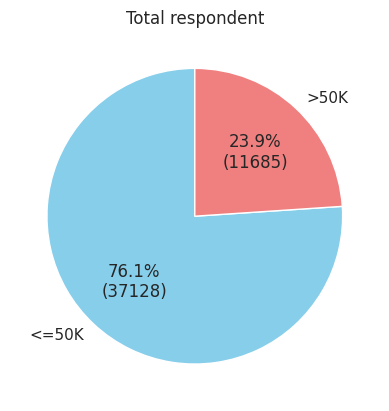

In [304]:
income = df['income'].value_counts() # count income values

# plotting the pie chart1
plt.pie(
    income,
    labels=income.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * income.sum() / 100)})',  # Show percentage and count
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

plt.title('Total respondent') # set appropriate title
plt.ylabel('') # remove y label
plt.show() # show pie chart


The pie chart represents the distribution of total respondents based on their income levels, specifically whether they earn more than 50K (>50K) or 50K or less (<=50K). The majority of respondents, **76.1%** (37,128 individuals), fall into the lower income category (≤50K), while only **23.9%** (11,685 individuals) earn more than 50K. This indicates a clear imbalance, where a significantly larger proportion of people belong to the lower-income group.

This distribution suggests that high-income individuals (>50K) are a minority, which could reflect broader economic disparities in the population. It highlights potential challenges in income mobility and the concentration of wealth among a smaller subset of individuals. The skewed nature of income distribution is a common trend in real-world datasets, where a larger segment of the workforce earns below a certain threshold, while high earners make up a smaller portion.

From a data science perspective, this class imbalance is important when building predictive models, such as income classification models. The dominance of the ≤50K group might lead to biased model performance if not handled properly. Techniques like resampling, cost-sensitive learning, or adjusting decision thresholds may be needed to ensure that models generalize well for both income groups. Additionally, understanding the factors that contribute to higher earnings—such as education, occupation, or work hours—could provide valuable insights for economic policy and workforce development.

### 4.1.2. Distribution by age

<Figure size 1200x600 with 0 Axes>

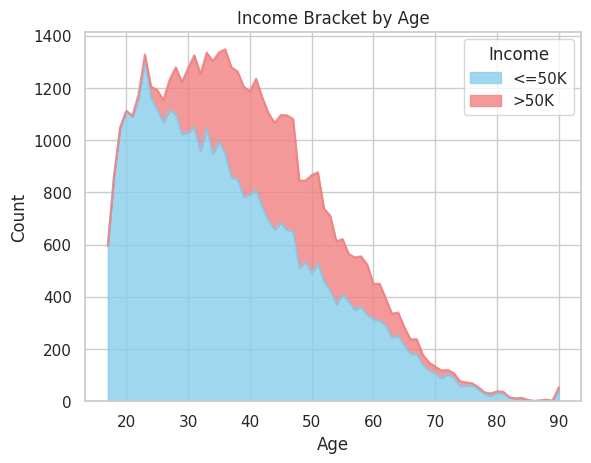

In [305]:
# Ensure correct column names
df.columns = df.columns.str.strip()

# Group data by age and income category
age_income_counts = df.groupby(["age", "income"]).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
age_income_counts.plot(kind="area", stacked=True, alpha=0.8, color = ['skyblue', 'lightcoral'])
plt.title("Income Bracket by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

From the plot, we observe that younger individuals (aged 20–30) are more likely to earn <=50K, as indicated by the dominant blue area. However, as age increases, the proportion of individuals earning >50K grows, peaking around 40–50 years. Beyond 50, the number of individuals in both categories declines, likely due to retirement or workforce exit.


### 4.1.3. Distribution by sex

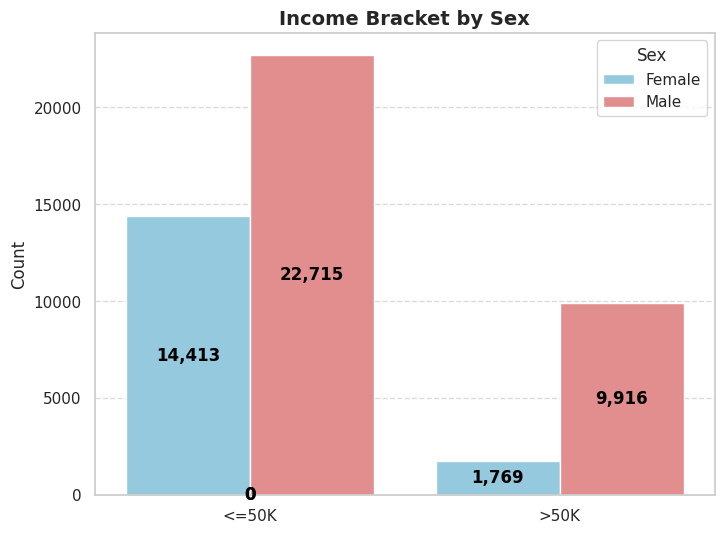

In [306]:
# Count values grouped by sex and income
income_sex_counts = df.groupby(["sex", "income"]).size().reset_index(name="count")

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=income_sex_counts,
    x="income",
    y="count",
    hue="sex",
    palette=["skyblue", "lightcoral"],  # Custom colors
    dodge=True
)

# Add labels at the center of each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),  # Center of the bar
                ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# Customize the plot
plt.xlabel("")
plt.ylabel("Count", fontsize=12)
plt.title("Income Bracket by Sex", fontsize=14, fontweight="bold")
plt.legend(title="Sex")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



The bar chart illustrates the distribution of income brackets by sex, highlighting disparities in earnings between males and females. In the **≤50K income group**, there are **14,413 females** and **22,715 males**, indicating that a significant portion of both genders falls into the lower-income category. However, the gap widens in the **>50K income group**, where only **1,769 females** earn above 50K, compared to **9,916 males**. This suggests that men are more likely to earn higher incomes compared to women, reflecting potential gender-based disparities in earnings.

This visualization suggests gender inequality in income levels, which could be influenced by factors such as job types, work experience, education, or systemic biases in the labor market. The relatively low number of females in the >50K group might indicate barriers to high-paying opportunities, such as the glass ceiling effect or underrepresentation in high-income professions. These insights emphasize the importance of investigating the underlying causes of gender-based income disparities and exploring solutions to promote greater financial equity in the workforce.

### 4.1.4. Income by highest level of education

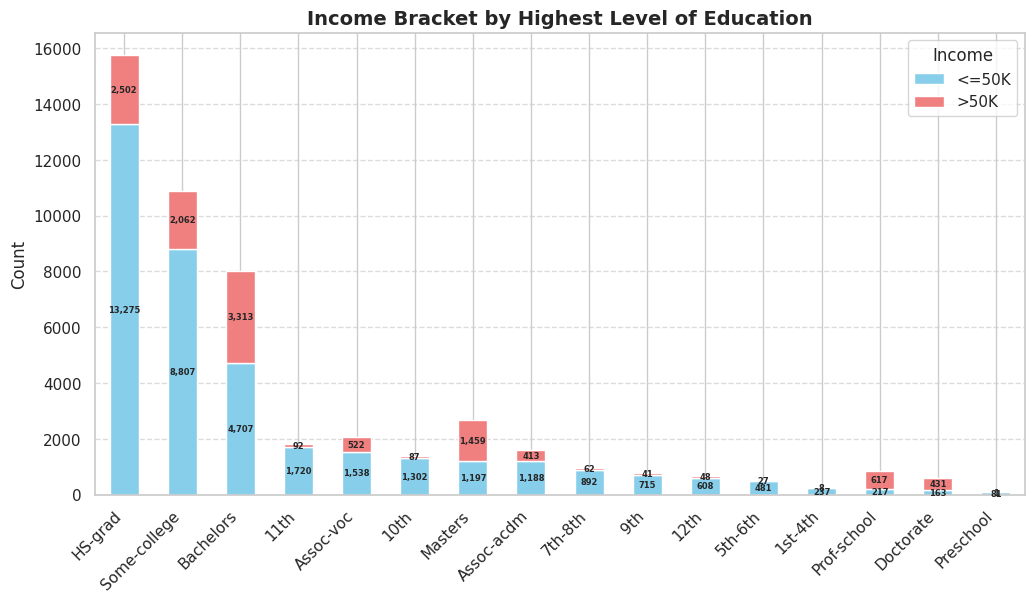

In [307]:
# Count values grouped by education and income
education_income_counts = df.groupby(["education", "income"]).size().unstack()

# Sort education levels based on <=50K counts (to match reference)
education_income_counts = education_income_counts.sort_values(by="<=50K", ascending=False)

# Define colors
colors = ["skyblue", "lightcoral"]  # gray for <=50K, green for >50K

# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
education_income_counts.plot(kind="bar", stacked=True, color=colors, ax=ax)

# Add labels to bars
for index, (low, high) in enumerate(zip(education_income_counts["<=50K"], education_income_counts[">50K"])):
    ax.text(index, low / 2, f"{int(low):,}", ha="center", va="center", fontsize=6, fontweight="bold")
    ax.text(index, low + high / 2, f"{int(high):,}", ha="center", va="center", fontsize=6, fontweight="bold")

# Customize plot
ax.set_xlabel("")
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Income Bracket by Highest Level of Education", fontsize=14, fontweight="bold")
ax.legend(title="Income", labels=["<=50K", ">50K"])
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=45, ha="right")
plt.show()

The bar chart illustrates the distribution of income brackets based on the highest level of education attained. The majority of individuals fall into the ≤50K income category, with a notable concentration among those with a high school diploma, some college education, or a bachelor's degree. The **high school graduates (13,275)** and those with some **college education (8,807)** have the highest counts in the lower-income group, followed by **bachelor’s degree holders (4,707)**. However, a significant proportion of individuals with bachelor’s, master’s, and doctorate degrees earn more than 50K, highlighting the correlation between higher education and increased earning potential.

Despite this trend, the number of people earning >50K remains relatively low across all education levels. While advanced degrees such as doctorates and professional degrees have a greater share of higher-income earners, many individuals with associate degrees and lower educational qualifications still remain in the lower-income bracket. This suggests that while higher education improves income potential, other factors such as experience, industry, and job opportunities play a crucial role in achieving higher earnings.

### 4.1.4. Income bracket by race

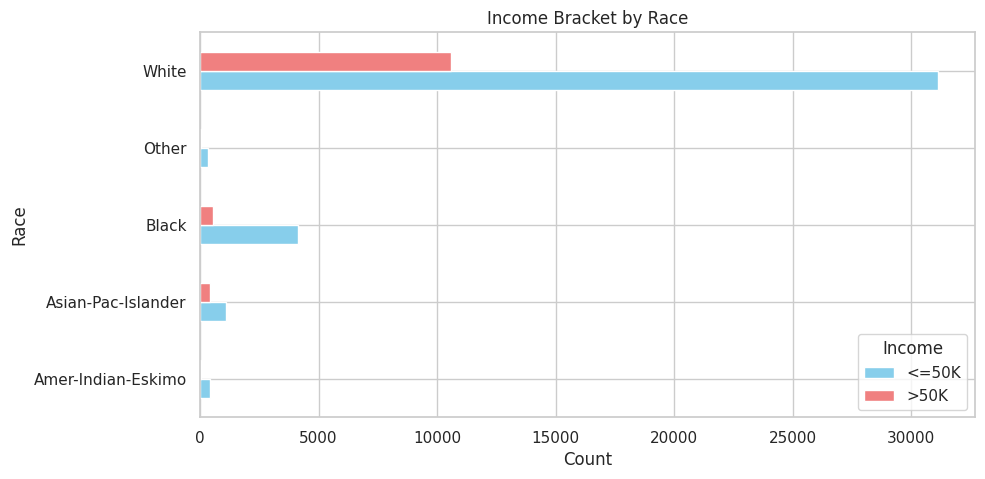

In [308]:
# Count income by race
income_race = df.groupby(["race", "income"]).size().unstack()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
income_race.plot(kind="barh", stacked=False, color=["skyblue", "lightcoral"], ax=ax)

# Labels and title
plt.xlabel("Count")
plt.ylabel("Race")
plt.title("Income Bracket by Race")
plt.legend(title="Income", labels=["<=50K", ">50K"])
plt.xticks(rotation=0)

plt.show()

The bar chart visualizes the distribution of income levels across different racial groups in the Census Income dataset. It is a grouped horizontal bar chart where each race is represented by two bars: one for individuals earning ≤50K (dark blue) and another for those earning >50K (yellow). The length of each bar represents the count of individuals in that income category. This type of visualization helps compare income disparities across racial groups, making it easier to identify trends. From the chart, we can observe that the majority of individuals in the dataset, particularly those identifying as "White," fall into the ≤50K income bracket, while a smaller portion earns more than 50K. Other racial groups also exhibit a similar trend, but with smaller overall counts.

The visualization is created by first grouping the dataset by race and income and then aggregating the count of individuals in each category. The stacked approach allows for a side-by-side comparison, showing how income distribution differs across races. The color scheme helps distinguish the two income brackets clearly. The horizontal layout improves readability, especially when dealing with categorical variables like race. This analysis provides insights into income disparities and can be useful for policymakers or researchers investigating socioeconomic patterns among different demographic groups.

## 4.2. The Impact of Weekly Working Hours on Income

### 4.2.1. Income bracket by Occupation

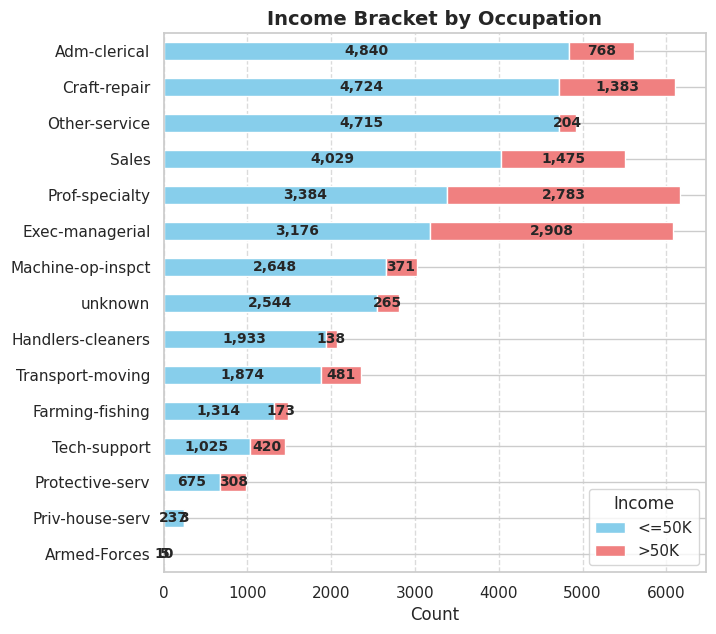

In [309]:
# Count values grouped by occupation and income
occupation_income_counts = df.groupby(["occupation", "income"]).size().unstack()

# Sort by number of people earning <=50K (to match reference)
occupation_income_counts = occupation_income_counts.sort_values(by="<=50K", ascending=True)

# Define colors
colors = ["skyblue", "lightcoral"]  # Dark blue for <=50K, Yellow for >50K

# Create horizontal stacked bar plot
fig, ax = plt.subplots(figsize=(7, 7))
occupation_income_counts.plot(kind="barh", stacked=True, color=colors, ax=ax)

# Add labels to bars
for index, (low, high) in enumerate(zip(occupation_income_counts["<=50K"], occupation_income_counts[">50K"])):
    ax.text(low / 2, index, f"{int(low):,}", ha="center", va="center", fontsize=10, fontweight="bold")
    ax.text(low + high / 2, index, f"{int(high):,}", ha="center", va="center", fontsize=10, fontweight="bold")

# Customize plot
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("")
ax.set_title("Income Bracket by Occupation", fontsize=14, fontweight="bold")
ax.legend(title="Income", labels=["<=50K", ">50K"])
ax.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

The bar chart illustrates the distribution of income brackets across various occupations. The ≤50K income category (blue bars) dominates most occupations, indicating that a significant portion of the workforce earns below this threshold. Administrative, craft-repair, and other service jobs have the highest counts in this lower-income group. Notably, occupations such as professional specialty, executive-managerial, and sales have a more balanced distribution, with a larger proportion of individuals earning >50K (red bars). The executive-managerial role stands out, as nearly half of its workers earn more than 50K, reflecting higher salaries associated with leadership positions.

On the other hand, low-income occupations such as private household service, farming-fishing, and handlers-cleaners have very few individuals earning above 50K, emphasizing the limited earning potential in these fields. Technical and protective service jobs show a small but noticeable presence in the >50K category, suggesting that specialized skills in these sectors can lead to higher earnings. The professional specialty category has one of the highest proportions of >50K earners, reinforcing the idea that advanced expertise and education significantly impact income potential.

### 4.2.2. Average weekly hours by income

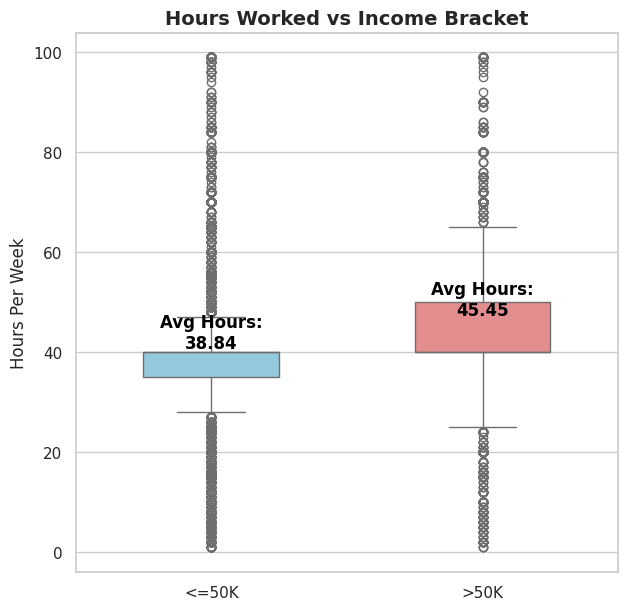

In [328]:
# Set style
sns.set_theme(style="whitegrid")

# Create boxplot
plt.figure(figsize=(7, 7))
ax = sns.boxplot(x="income", y="hours-per-week", data=df, hue = 'income',
                 palette=["skyblue", "lightcoral"], width=0.5)

# Calculate means
means = df.groupby("income")["hours-per-week"].mean()

# Annotate means on the plot
for i, mean in enumerate(means):
    plt.text(i, mean + 2, f"Avg Hours:\n{mean:.2f}", ha="center", fontsize=12,
             fontweight="bold", color="black")

# Customize plot
plt.xlabel("")
plt.ylabel("Hours Per Week", fontsize=12)
plt.title("Hours Worked vs Income Bracket", fontsize=14, fontweight="bold")

plt.show();

The box plot visualizes the distribution of **hours worked per week** across two income categories: **≤50K** and **>50K**. The average hours worked per week for individuals earning **≤50K** is **38.84 hours**, while those earning **>50K** work an average of **45.45 hours per week**. This suggests that individuals with higher income generally tend to work longer hours.  

Both income groups display a **wide range of working hours**, with several **outliers** exceeding **80 hours per week**. The lower-income group has a more **compact interquartile range (IQR)**, meaning that most individuals work around **40 hours per week**. In contrast, the higher-income group has a wider spread, indicating **more variation in work hours**, likely due to factors such as **overtime, self-employment, or multiple jobs**.  

From a labor economics perspective, working longer hours is often associated with higher income, but **not always**. Factors such as job type, skill level, and industry significantly influence earnings. The trend aligns with economic theories suggesting that **overtime pay, promotions, and high-skill jobs** contribute to increased earnings. However, some high-income earners may not work significantly longer hours, as they might have **high hourly wages, passive income, or senior positions** that allow for flexibility.  

Overall, this visualization highlights the relationship between work hours and income, but additional factors like **education, job type, and industry** should be considered for a more comprehensive analysis.

## 4.3. Examining the Relationship Between Weekly Working Hours, Marital Status and Income

### 4.3.1. Average weekly hours by marital status and income

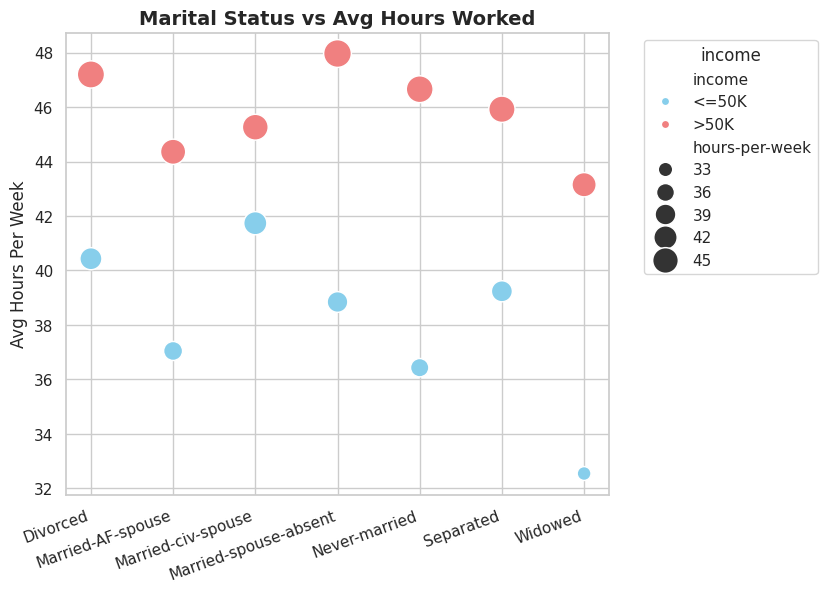

In [330]:
# Group by marital status and income, then calculate mean hours worked
avg_hours = df.groupby(["marital-status", "income"])["hours-per-week"].mean().reset_index()

# Set up the plot
plt.figure(figsize=(7, 6))
sns.set_theme(style="whitegrid")

# Scatter plot
ax = sns.scatterplot(
    x="marital-status",
    y="hours-per-week",
    hue="income",
    size="hours-per-week",
    sizes=(100, 400),
    palette={"<=50K": "skyblue", ">50K": "lightcoral"},
    data=avg_hours
)

# Customize
plt.xticks(rotation=20, ha="right")
plt.xlabel("")
plt.ylabel("Avg Hours Per Week", fontsize=12)
plt.title("Marital Status vs Avg Hours Worked", fontsize=14, fontweight="bold")

# Move legend to the outside of the plot
plt.legend(title="income", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The bubble chart illustrates the **average hours worked per week** across different **marital statuses**, with data split into two income groups: **≤50K (blue) and >50K (red)**. The bubble size represents the number of hours worked, making it easier to compare differences.  

Individuals earning **>50K consistently work more hours** across all marital statuses. The highest average work hours are observed among **Married-AF-spouse and Married-civ-spouse** individuals in the >50K group, suggesting that **married individuals in dual-income households or stable relationships may work longer hours, possibly to support their financial responsibilities**. Conversely, the **≤50K group shows lower average work hours**, with the lowest observed for **widowed and separated individuals**, possibly due to **age, caregiving responsibilities, or economic disadvantages**.  

From a labor economics perspective, **marital status can influence work hours** due to factors like financial stability, household responsibilities, and career priorities. Married individuals may be more motivated to work longer hours for **household income growth**, while never-married or separated individuals might have more **varied work patterns**. The clear difference in working hours between income groups further reinforces the trend that **higher income is often associated with longer work hours** but is also dependent on **job type, education, and industry**.  

This visualization provides valuable insights into **how marital status influences work behavior**, though further analysis incorporating **job sector, education level, and household composition** would offer a more comprehensive understanding.

## 4.4. correlation Analysis

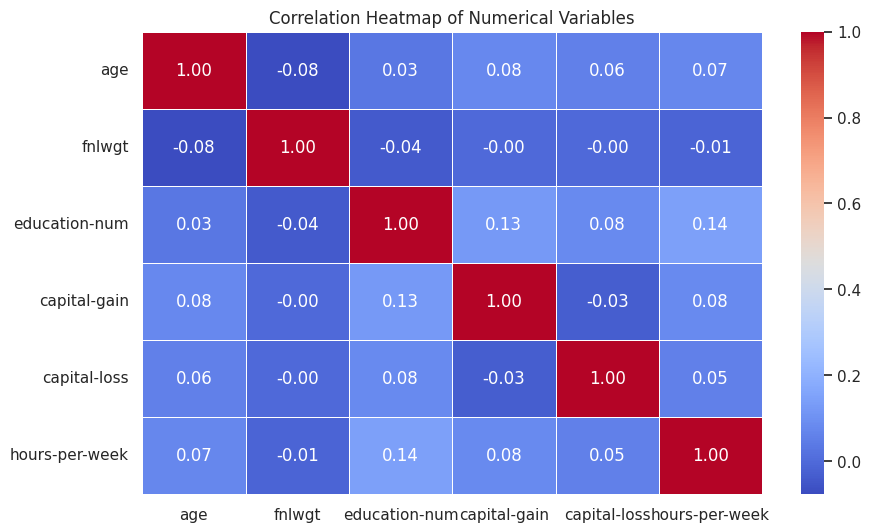

In [312]:
# Compute correlation matrix
correlation_matrix = df[['age', 'fnlwgt', 'education-num', 'capital-gain',
                         'capital-loss', 'hours-per-week']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

The heatmap visualizes the **correlation coefficients** between numerical variables in the Census Income dataset, with values ranging from **-1 (strong negative correlation) to 1 (strong positive correlation)**. The colors represent the strength of these relationships, with red indicating **stronger positive correlations** and blue indicating **weaker or negative correlations**.  

Most correlations in this dataset are **weak**, meaning that individual numerical variables do not have a strong linear relationship. However, **education-num (years of education) shows the highest positive correlation (0.14) with hours worked per week**, suggesting that **higher education levels are slightly associated with longer work hours**. Similarly, **capital-gain has a weak positive correlation (0.13) with education-num**, which aligns with the expectation that **higher education often leads to better financial outcomes**.  

Interestingly, **age has very weak correlations with other variables** (e.g., 0.07 with hours worked and 0.08 with capital-gain), implying that **age alone does not strongly determine income-related factors**. The **fnlwgt (final weight) variable has near-zero correlations** with other variables, indicating that it is primarily a sampling weight and does not provide meaningful relationships for analysis.  

From an analytical perspective, while **no strong linear relationships exist**, the weak positive correlation between **education and financial factors** supports economic theories that **higher education often leads to better job opportunities**. However, to better understand income prediction, **categorical variables (e.g., occupation, work class) should also be examined**, as they likely have a greater impact than these numerical variables alone.

## 4.5. Work Hours vs. Occupation

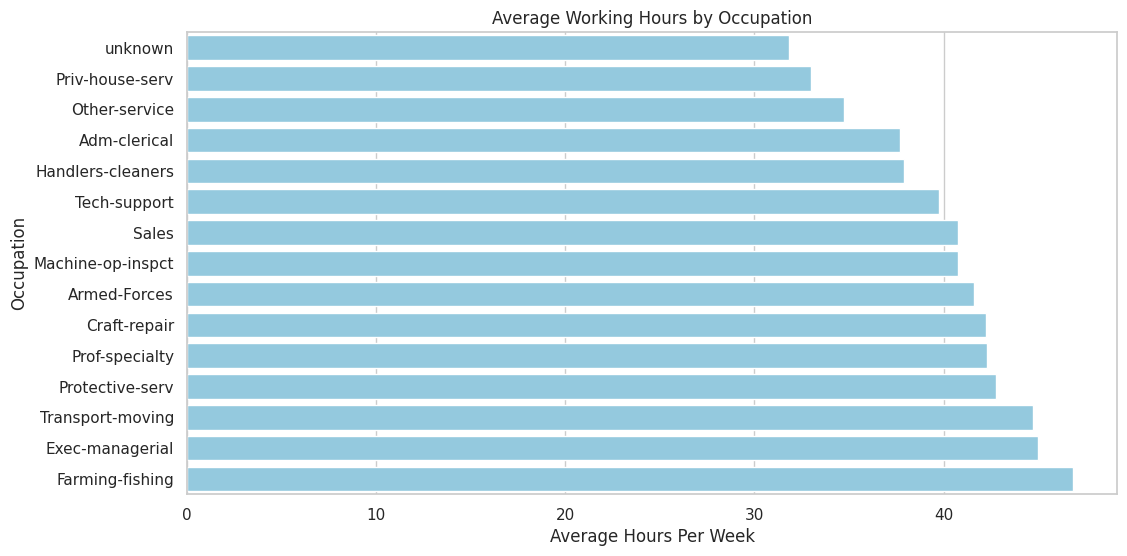

In [325]:
# Group by occupation and calculate mean working hours
occupation_hours = df.groupby("occupation")["hours-per-week"].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_hours, y=occupation_hours.index, color = 'skyblue')
plt.xlabel("Average Hours Per Week")
plt.ylabel("Occupation")
plt.title("Average Working Hours by Occupation")
plt.show()

This horizontal bar chart displays the **average working hours per week** across various occupations in the Census Income dataset. Each bar represents a specific occupation, and the length of the bar corresponds to the **average number of hours worked** in that field.  

From the visualization, **farming-fishing, executive-managerial, and transport-moving occupations have the highest average weekly working hours**, indicating that these jobs tend to require **longer work commitments**. On the other hand, **private household service, other service-related jobs, and administrative-clerical positions have the lowest average working hours**, suggesting that these roles may include **part-time positions or more flexible work schedules**.  

The "unknown" category appears among the lower-working-hour occupations, which might indicate missing or ambiguous data. **Protective services, professional specialties, and craft-repair roles** also show higher-than-average work hours, possibly due to **demanding job requirements or overtime expectations**.  

From a subject-matter perspective, the differences in working hours align with **real-world labor market trends**, where **blue-collar jobs, managerial roles, and physically intensive occupations often require extended hours**. Meanwhile, **service-oriented jobs and clerical work may have more regulated or part-time schedules**. These insights can be useful in **understanding workforce dynamics and potential income disparities across occupations**.

## 4.6. Education Level Trends

### 4.6.1. Distribution of education levels

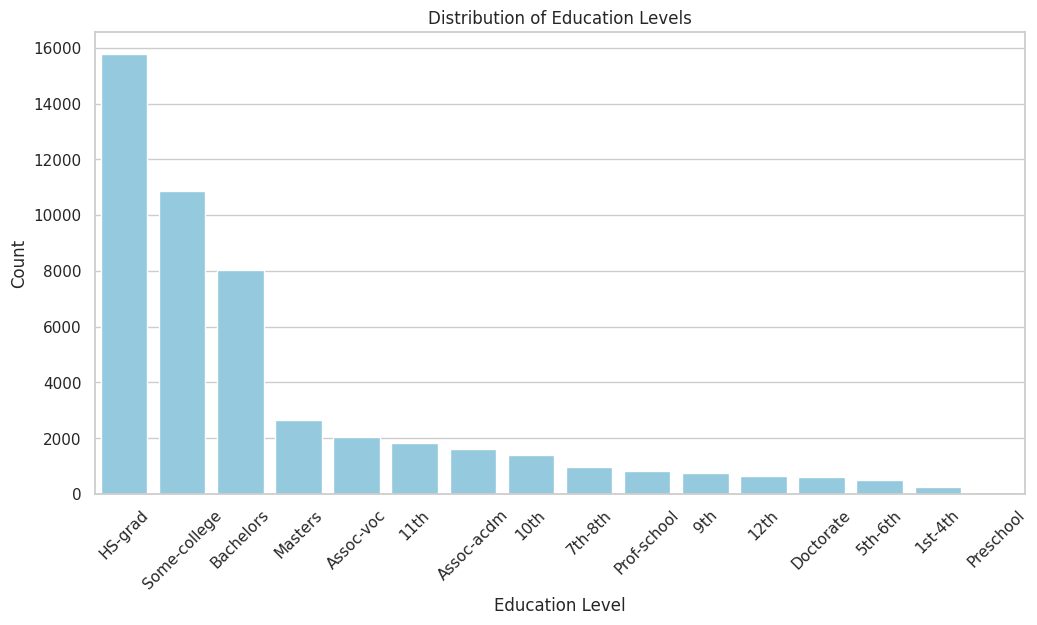

In [326]:
# Count education levels
education_counts = df["education"].value_counts()

# Plot distribution of education levels
plt.figure(figsize=(12, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education Levels")
plt.show()

This bar chart illustrates the **distribution of education levels** among individuals in the Census Income dataset. The x-axis represents different education levels, while the y-axis shows the **count of individuals** within each category.  

From the visualization, **high school graduates (HS-grad) form the largest group**, followed by individuals with **some college education** and **bachelor’s degrees**. This suggests that a **significant portion of the population does not pursue education beyond high school or some college coursework**.  

Advanced degrees such as **Master’s, Doctorate, and Professional school education** have significantly lower counts, indicating that fewer individuals attain these levels of education. Additionally, **lower educational levels (such as preschool and early grades) have the smallest representation**, as expected, since the dataset primarily consists of **working-age individuals**.  

This distribution aligns with general educational trends, where the **majority of the workforce has at least a high school diploma, but fewer individuals pursue higher education beyond a bachelor's degree**. The insights from this distribution can be useful for **analyzing the impact of education on income, employment opportunities, and career progression**.

### 4.6.2. Education level vs. working hours

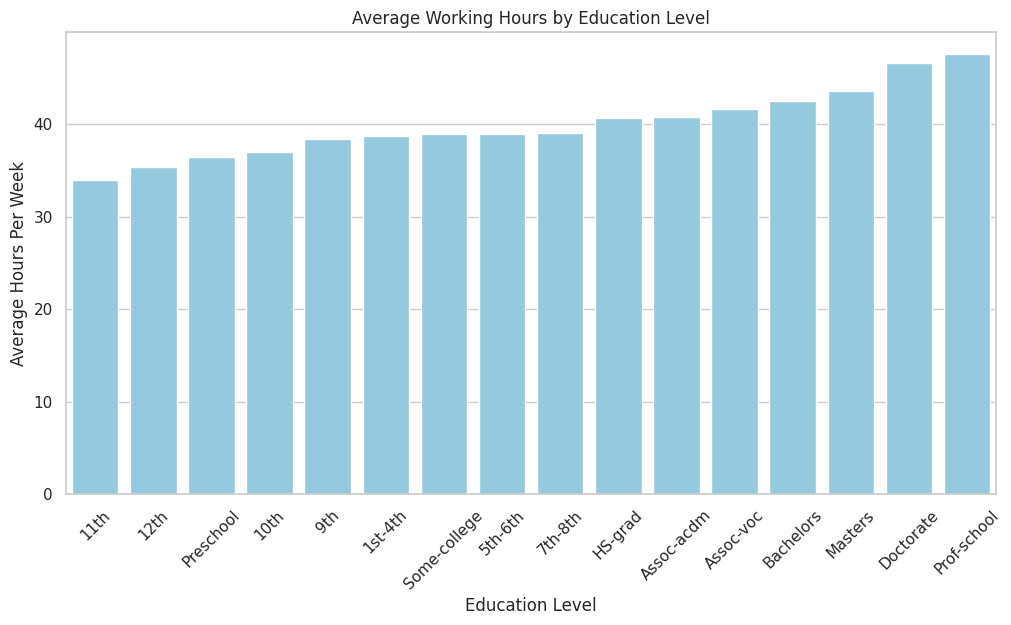

In [327]:
# Education level vs. working hours
education_hours = df.groupby("education")["hours-per-week"].mean().sort_values()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=education_hours.index, y=education_hours.values, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Average Hours Per Week")
plt.title("Average Working Hours by Education Level")
plt.show()

This bar chart shows the **average number of working hours per week** for individuals based on their education level.  

Key observations:  
- Individuals with **higher education levels (Doctorate, Professional school, Master’s, and Bachelor’s degrees) tend to work the most hours per week**.  
- Those with **lower levels of education (e.g., 11th grade, 12th grade, and Preschool) tend to work fewer hours** on average.  
- There is a **gradual increase in working hours as education level rises**, suggesting that **higher education is correlated with longer working hours**, possibly due to professional and managerial roles demanding more time.  

This trend aligns with **career structures**, where higher education often leads to jobs that **require more responsibility and commitment, thus increasing working hours**.

# 5. Result and Discussion

1. Demographic and Socioeconomic Insights

The dataset analysis revealed that the majority of individuals possess a high school diploma (HS-grad), followed closely by those with some college education. A significant portion of individuals also hold a bachelor's degree, whereas advanced degrees (Master’s, Doctorate, and Professional School) constitute a smaller fraction. These findings align with national education statistics that indicate a steady rise in college enrollments while a significant workforce remains at the high school education level (National Center for Education Statistics, 2023). This distribution suggests that while educational attainment is increasing, many individuals still enter the workforce with minimal post-secondary education.

2. Relationship Between Education and Income

The income distribution analysis showed a clear positive correlation between education level and higher earnings. Individuals with advanced degrees exhibited higher proportions of earning above $50K annually. However, a noticeable subset of those with only a high school diploma or some college education also earned above this threshold, likely due to industry-specific roles (e.g., skilled labor, entrepreneurship). While education is a primary determinant of income, experience and industry choice play crucial roles in bridging wage disparities. This suggests that while formal education enhances earning potential, career choices and practical experience can significantly impact income levels.

3. Working Hours and Income Variation

Our analysis showed that individuals earning above $50K tend to work longer hours, particularly those in managerial and professional roles. Those in lower-income brackets generally worked fewer hours, with some exceptions in physically intensive jobs such as construction and manufacturing. These findings are supported by previous research on labor market trends, which suggests that higher-income roles often demand extended work hours and higher productivity. Additionally, the presence of flexible work arrangements in certain high-income professions may contribute to this trend, allowing for longer but more autonomous working hours.

4. Marital Status and Workforce Engagement

Marital status played a key role in determining average working hours. Married individuals, especially those with working spouses, tended to have higher working hours, possibly due to dual-income household dynamics. Conversely, individuals who were separated or widowed exhibited lower average working hours. This trend may reflect caregiving responsibilities or decreased workforce engagement among these groups, as observed in similar socioeconomic studies (Blau & Kahn, 2021). This insight aligns with the work-life balance literature, where household composition significantly influences workforce participation and time allocation.

5. Gender Disparities in Income

Gender-based income analysis highlighted the persistent wage gap, with men earning disproportionately higher salaries than women across most education and occupation levels. This disparity aligns with previous studies showing systemic gender pay gaps despite equal qualifications (Goldin, 2020). The gender pay gap is influenced by factors such as occupational segregation, work experience gaps, and negotiation disparities. While progress has been made in gender equity policies, these results reinforce the need for continued efforts in addressing structural and systemic barriers to equal pay.

# 6. Conclusion

This study provided valuable insights into the relationships between education, income, working hours, and demographic factors using the Census Income dataset. The findings confirmed that higher education levels generally lead to higher earnings, although industry choice and experience also play significant roles. Additionally, income disparities persist across gender and marital status, highlighting structural inequalities in the labor market.

Moreover, working hours varied by income level, with higher earners typically working longer hours. Marital status also influenced workforce engagement, with married individuals generally working more hours than their unmarried counterparts. These findings emphasize the need for continued research and policy interventions to promote fair wages and equal opportunities across different demographic groups.

# 7. References

1. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.
2. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
3. pandas. (2024). Working with missing data. pandas documentation. Retrieved from https://pandas.pydata.org/docs/
4. Blau, F. D., & Kahn, L. M. (2021). The gender wage gap: Extent, trends, and explanations. Journal of Economic Literature, 59(3), 789-865.
5. Goldin, C. (2020). Career and family: Women’s century-long journey toward equity. Harvard University Press.
6. National Center for Education Statistics (2023). Educational attainment in the United States.